S=P*(1+r/365)^t \
A - конечная сумма вклада с процентами\
P - начальная сумма вклада\
r - годовая процентная ставка в десятичном виде (например, 0.05 для 5%)\
t - количество дней, на которое размещается вклад и через которое происходит начисление процентов\

In [1]:
import pandas as pd
stats = pd.read_csv('stats.csv') 

In [24]:
stats

,№,Банк,Продукт,Эффективная ставка,Минимальная сумма,Срок вложений,Выплата процентов,Дополнительная информация
0,1,МТС Банк,МТС-вклад,16.21%,"10,000.00 ₽",180,30,Процентные ставки по вкладу действуют при офор...
1,2,МТС Банк,МТС-вклад (с пополнением в течение 30 дней),15.50%,"10,000.00 ₽",180,30,Пополнение возможо только в течение 30 дней; ч...
2,3,ВТБ,"Вклад ""Выгодное начало""",15.50%,"30,000.00 ₽",180,30,"Вклад доступен только тем клиентам, у которых ..."
3,4,ВТБ,"Вклад ""Новое время""",14.09%,"30,000.00 ₽",180,30,"Открыть вклад можно онлайн, через мобильное пр..."
4,5,ВТБ,ВТБ Вклад,14.41%,"500,000.00 ₽",180,30,"Без пополнения и снятия, выплата процентов про..."
5,6,Свой Банк,Свой Вклад,17.00%,"300,000.00 ₽",180,30,Вклад открывается при условии отсутствия в теч...
6,7,Свой Банк,Высокий процент,16.00%,"30,000.00 ₽",180,181,"Отсутствует капитализация, частичное снятие не..."
7,8,Тинькофф,СмартВклад с повышенной ставкой,17.12%,"50,000.00 ₽",90,30,"вклад открывается только новым клиентам, у кот..."
8,9,Тинькофф,СмартВклад со стандартной ставкой,15.09%,"50,000.00 ₽",60,30,"вклад открывается только новым клиентам, у кот..."
9,10,Новикомбанк,Рантье Новикомбанк,15.91%,"10,000.00 ₽",250,30,Увеличение ставки возможно при увеличении сумм...


In [4]:
import pandas as pd
import matplotlib.pyplot as plt

stats = pd.read_csv('stats.csv')

def calculate_result(principal, rate, term):
    return principal * (1 + rate/365) ** (term)

client_principal = float(input("Введите сумму вклада: "))
min_principal = stats['Минимальная сумма'].str.replace('$', '').str.replace(',', '').str.replace('₽', '').astype(float).min()

if client_principal < min_principal:
    print(f"Ошибка: Введенная сумма вклада ({client_principal:.2f}) меньше минимальной суммы ({min_principal:.2f}).")
    exit()

results = []
for _, row in stats.iterrows():
    bank = row['Банк']
    product = row['Продукт']
    rate = float(row['Эффективная ставка'].strip('%')) / 100
    min_principal = float(row['Минимальная сумма'].replace('$', '').replace(',', '').replace('₽', ''))
    term = int(row['Срок вложений'])

    if client_principal >= min_principal:
        result = calculate_result(client_principal, rate, term)
        results.append((bank, product, term, result))

results.sort(key=lambda x: x[0])

results.sort(key=lambda x: x[3], reverse=True)

print("Результаты вычислений:")
for bank, product, term, result in results:
    print(f"Банк: {bank}, Продукт: {product}, Срок вложений: {term}, Результат: {result:.2f}")

Результаты вычислений:
Банк: Солид Банк, Продукт: Детский , Срок вложений: 1096, Результат: 182500.72
Банк: Альфа Банк, Продукт: Альфа-вклад. Максимальный, Срок вложений: 1095, Результат: 161590.44
Банк: Цифра Банк, Продукт: Эффективный, Срок вложений: 1095, Результат: 159328.98
Банк: Альфа Банк, Продукт: Альфа-вклад (без пополнения и снятия), Срок вложений: 1095, Результат: 154482.96
Банк: Банк "Россия", Продукт: Классический, Срок вложений: 1095, Результат: 150008.97
Банк: Солид Банк, Продукт: Солидный, Срок вложений: 730, Результат: 134331.49
Банк: Трансстройбанк, Продукт: Стабильный, Срок вложений: 360, Результат: 117506.42
Банк: Цифра Банк, Продукт: Основной, Срок вложений: 395, Результат: 117353.87
Банк: Абсолют Банк, Продукт: Турбо, Срок вложений: 360, Результат: 114081.82
Банк: Россельхозбанк, Продукт: Накопи на мечту, Срок вложений: 1095, Результат: 113563.57
Банк: Новикомбанк, Продукт: Рантье Новикомбанк, Срок вложений: 250, Результат: 111510.53
Банк: Тимер Банк, Продукт: Пра

In [5]:
import pandas as pd

stats = pd.read_csv('stats.csv')

unique_terms = stats['Срок вложений'].unique()
unique_terms.sort()
print("Отсортированные уникальные значения столбца 'Срок вложений':")
print(unique_terms)

unique_min_principals = stats['Минимальная сумма'].unique()
unique_min_principals.sort()
print("\nОтсортированные уникальные значения столбца 'Минимальная сумма':")
print(unique_min_principals)

Отсортированные уникальные значения столбца 'Срок вложений':
[  30   60   90  152  180  186  250  360  395  730 1095 1096]

Отсортированные уникальные значения столбца 'Минимальная сумма':
[' 1,000.00 ₽ ' ' 1,400,000.00 ₽ ' ' 10,000.00 ₽ ' ' 100,000.00 ₽ '
 ' 15,000,000.00 ₽ ' ' 15,000.00 ₽ ' ' 3,000.00 ₽ ' ' 3,500,000.00 ₽ '
 ' 30,000.00 ₽ ' ' 300,000.00 ₽ ' ' 5,000.00 ₽ ' ' 50,000.00 ₽ '
 ' 500,000.00 ₽ ' ' 500.00 ₽ ']


In [5]:
import pandas as pd
import matplotlib.pyplot as plt

stats = pd.read_csv('stats.csv')

def calculate_result(principal, rate, term):
    return principal * (1 + rate/365) ** (term)

client_principal = float(input("Введите сумму вклада: "))
client_term = int(input("Введите желаемый срок вклада в днях: "))

min_principal = stats['Минимальная сумма'].str.replace('$', '').str.replace(',', '').str.replace('₽', '').astype(float).min()

if client_principal < min_principal:
    print(f"Ошибка: Введенная сумма вклада ({client_principal:.2f}) меньше минимальной суммы ({min_principal:.2f}).")
    exit()

results = []
for _, row in stats.iterrows():
    bank = row['Банк']
    product = row['Продукт']
    rate = float(row['Эффективная ставка'].strip('%')) / 100
    min_principal = float(row['Минимальная сумма'].replace('$', '').replace(',', '').replace('₽', ''))
    term = int(row['Срок вложений'])
    
    
    if client_principal >= min_principal and term <= client_term:
        result = calculate_result(client_principal, rate, term)
        results.append((bank, product, term, result))

if not results:
    print("Ошибка: Не найдено подходящих продуктов для введенного срока вклада.")
    exit()

results.sort(key=lambda x: x[0])
results.sort(key=lambda x: x[3], reverse=True)

print("Результаты вычислений:")
for bank, product, term, result in results:
    print(f"Банк: {bank}, Продукт: {product}, Срок вложений: {term}, Результат: {result:.2f},")

Результаты вычислений:
Банк: Тинькофф, Продукт: СмартВклад со стандартной ставкой, Срок вложений: 60, Результат: 102511.04,
Банк: Абсолют Банк, Продукт: Накопительный счет ПЛЮС, Срок вложений: 30, Результат: 101157.11,
Банк: Тимер Банк, Продукт: Кошелек, Срок вложений: 30, Результат: 100991.02,


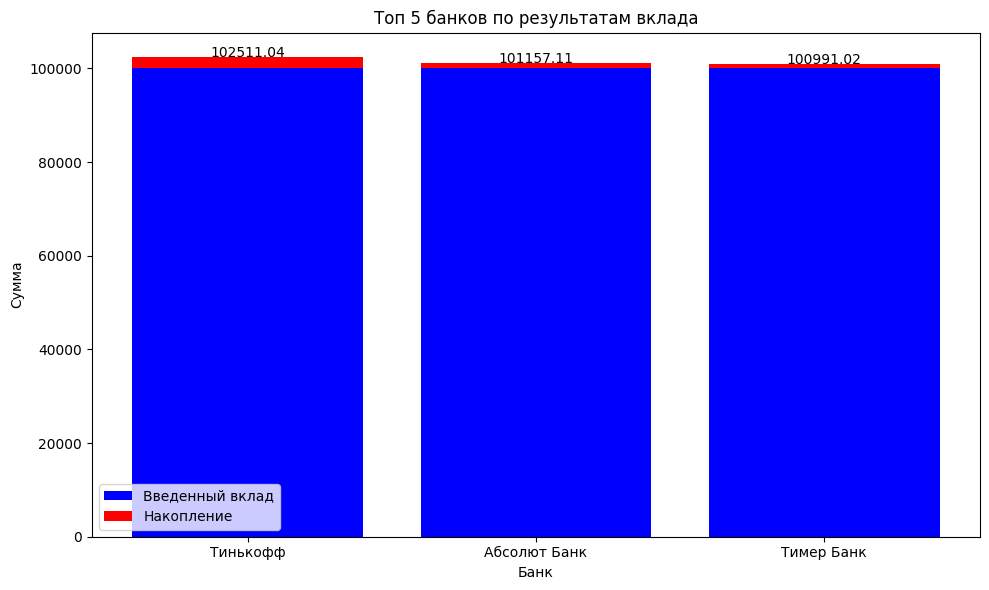

In [9]:
import pandas as pd
import matplotlib.pyplot as plt

stats = pd.read_csv('stats.csv')

def calculate_result(principal, rate, term):
    return principal * (1 + rate/365) ** (term)

client_principal = float(input("Введите сумму вклада: "))
client_term = int(input("Введите желаемый срок вклада в днях: "))

min_principal = stats['Минимальная сумма'].str.replace('$', '').str.replace(',', '').str.replace('₽', '').astype(float).min()

if client_principal < min_principal:
    print(f"Ошибка: Введенная сумма вклада ({client_principal:.2f}) меньше минимальной суммы ({min_principal:.2f}).")
    exit()

results = []
for _, row in stats.iterrows():
    bank = row['Банк']
    product = row['Продукт']
    rate = float(row['Эффективная ставка'].strip('%')) / 100
    min_principal = float(row['Минимальная сумма'].replace('$', '').replace(',', '').replace('₽', ''))
    term = int(row['Срок вложений'])
    if client_principal >= min_principal and term <= client_term:
        result = calculate_result(client_principal, rate, term)
        results.append((bank, product, term, result))

if not results:
    print("Ошибка: Не найдено подходящих продуктов для введенного срока вклада.")
    exit()

results.sort(key=lambda x: x[0])
results.sort(key=lambda x: x[3], reverse=True)

top_banks = results[:5]

banks = [bank for bank, _, _, _ in top_banks]
principal_amounts = [client_principal] * len(top_banks)
accumulation_amounts = [result - client_principal for _, _, _, result in top_banks]

fig, ax = plt.subplots(figsize=(10, 6))

ax.bar(banks, principal_amounts, label='Введенный вклад', color='blue')
ax.bar(banks, accumulation_amounts, bottom=principal_amounts, label='Накопление', color='red')

ax.set_xlabel('Банк')
ax.set_ylabel('Сумма')
ax.set_title('Топ 5 банков по результатам вклада')
ax.legend()

for i, (principal, accumulation) in enumerate(zip(principal_amounts, accumulation_amounts)):
    total = principal + accumulation
    ax.text(i, total + 0.05, f'{total:.2f}', ha='center')

plt.tight_layout()
plt.show()

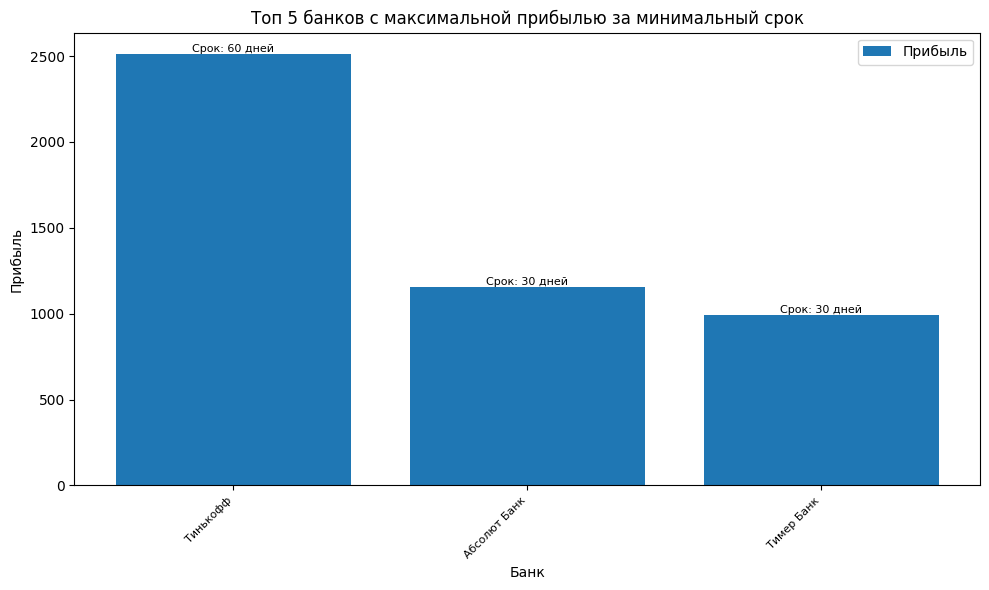

In [10]:
import pandas as pd
import matplotlib.pyplot as plt

stats = pd.read_csv('stats.csv')

def calculate_result(principal, rate, term):
    return principal * (1 + rate/365) ** (term)

client_principal = float(input("Введите сумму вклада: "))
client_term = int(input("Введите желаемый срок вклада в днях: "))

min_principal = stats['Минимальная сумма'].str.replace('$', '').str.replace(',', '').str.replace('₽', '').astype(float).min()

if client_principal < min_principal:
    print(f"Ошибка: Введенная сумма вклада ({client_principal:.2f}) меньше минимальной суммы ({min_principal:.2f}).")
    exit()

results = []
for _, row in stats.iterrows():
    bank = row['Банк']
    product = row['Продукт']
    rate = float(row['Эффективная ставка'].strip('%')) / 100
    min_principal = float(row['Минимальная сумма'].replace('$', '').replace(',', '').replace('₽', ''))
    term = int(row['Срок вложений'])
    frequency = int(row['Выплата процентов '])
    if client_principal >= min_principal and term <= client_term:
        result = calculate_result(client_principal, rate, term)
        profit = result - client_principal
        results.append((bank, product, term, profit))

if not results:
    print("Ошибка: Не найдено подходящих продуктов для введенного срока вклада.")
    exit()

results.sort(key=lambda x: x[0])
results.sort(key=lambda x: x[3], reverse=True)

top_banks = results[:5]

banks = [bank for bank, _, _, _ in top_banks]
terms = [term for _, _, term, _ in top_banks]
profits = [profit for _, _, _, profit in top_banks]

fig, ax = plt.subplots(figsize=(10, 6))

ax.bar(banks, profits, label='Прибыль')
ax.set_xlabel('Банк')
ax.set_ylabel('Прибыль')
ax.set_title('Топ 5 банков с максимальной прибылью за минимальный срок')
ax.legend()

plt.xticks(rotation=45, ha='right', fontsize=8)

for i, term in enumerate(terms):
    ax.text(i, profits[i], f'Срок: {term} дней', ha='center', va='bottom', fontsize=8)

plt.tight_layout()
plt.show()